In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv('3D_spatial_network.txt',sep=",",names=["a","latitude","longitude","altitude"])
df.head()

,a,latitude,longitude,altitude
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [20]:
df =df.drop("a",axis=1)

In [21]:
df.head()

,latitude,longitude,altitude
0,9.349849,56.740876,17.052772
1,9.350188,56.740679,17.614840
2,9.350549,56.740544,18.083536
3,9.350806,56.740484,18.279465
4,9.351053,56.740486,18.422974


In [22]:
learning_rate=0.01
iterations=200

In [30]:
point = (df['latitude'][5000],df['longitude'][5000])
point

(9.2026105, 57.10443879999999)

In [32]:
df2 = (df-df.mean())/df.std()
df2.head()

,latitude,longitude,altitude
0,-0.608892,-1.184481,-0.275681
1,-0.608350,-1.185162,-0.245492
2,-0.607776,-1.185625,-0.220318
3,-0.607366,-1.185832,-0.209794
4,-0.606972,-1.185826,-0.202086


In [43]:
my_data=df2

In [44]:
#setting the matrixes
X = my_data.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = my_data.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])

#set hyper parameters
alpha = 0.01
iters = 1000

In [45]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [46]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[-1.69468303e-13  1.48160724e-01 -1.88406667e-01]]
0.486774222426062


Text(0.5, 1.0, 'Error vs. Training Epoch')

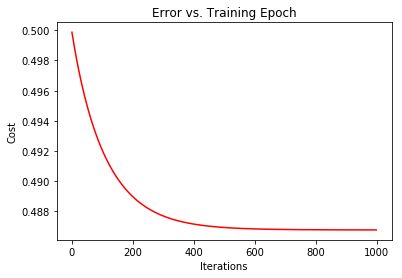

In [49]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [48]:
df.head()

,latitude,longitude,altitude
0,9.349849,56.740876,17.052772
1,9.350188,56.740679,17.614840
2,9.350549,56.740544,18.083536
3,9.350806,56.740484,18.279465
4,9.351053,56.740486,18.422974


In [54]:
w1 = g[0][1]/(df['latitude'].std())*df['altitude'].std()

In [55]:
w1

4.397004600169081

In [56]:
w2 = g[0][2]/(df['longitude'].std())*df['altitude'].std()

In [57]:
w2

-12.117459789669791

In [58]:
w0 = df['altitude'].mean() + g[0][0]*df['altitude'].std() - (g[0][1]*df['latitude'].mean()*df['altitude'].std())/df['latitude'].std() - (g[0][2]*df['longitude'].mean()*df['altitude'].std())/df['longitude'].std()

In [59]:
w0

671.1046222449406